# EDA_MTA Project Analysis

- Haneen Alhomoud
- Haneen.77@hotmail.com

## 1- Dataset Overview

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'

In [36]:
def get_data(months):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for num in months:
        file_url = url.format(num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs) #return all text files data concatenated as one dataframe

sep = [190907,190914,190921,190928]
octo = [191005, 191012, 191019, 191026]
nov = [191102, 191109, 191116, 191123, 191130]
months = sep+octo+nov
df = get_data(months) #months

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676241 entries, 0 to 205543
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [5]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/31/2019,00:00:00,REGULAR,7183242,2433142
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/31/2019,04:00:00,REGULAR,7183258,2433149
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/31/2019,08:00:00,REGULAR,7183278,2433176
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/31/2019,12:00:00,REGULAR,7183393,2433262
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/31/2019,16:00:00,REGULAR,7183572,2433312


## Create MTA DataBase

In [6]:
#Save MTA dataFrame to csv file
df.to_csv('MTA.csv', encoding = 'utf-8', index=False)

In [7]:
engine = create_engine("sqlite:///MTA.db")

In [8]:
tables = engine.table_names()
tables

<ipython-input-8-a953dc14c126>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  tables = engine.table_names()


['turnstiles']

In [9]:
print(engine.execute("SELECT * FROM turnstiles LIMIT 1").fetchall())

[('A002', 'R051', '02-00-00', '59 ST', 'NQR456W', 'BMT', '08/31/2019', '00:00:00', 'REGULAR', 7183242, 2433142)]


In [10]:
engine.execute("DELETE FROM turnstiles WHERE CA = 'C/A'")
print(engine.execute("SELECT * FROM turnstiles LIMIT 1").fetchall())

[('A002', 'R051', '02-00-00', '59 ST', 'NQR456W', 'BMT', '08/31/2019', '00:00:00', 'REGULAR', 7183242, 2433142)]


In [11]:
print(engine.execute("PRAGMA table_info(turnstiles);").fetchall())

[(0, 'CA', 'TEXT', 0, None, 0), (1, 'UNIT', 'TEXT', 0, None, 0), (2, 'SCP', 'TEXT', 0, None, 0), (3, 'STATION', 'TEXT', 0, None, 0), (4, 'LINENAME', 'TEXT', 0, None, 0), (5, 'DIVISION', 'TEXT', 0, None, 0), (6, 'DATE_', 'TEXT', 0, None, 0), (7, 'TIME_', 'TEXT', 0, None, 0), (8, 'DESC_', 'TEXT', 0, None, 0), (9, 'ENTRIES', 'INTEGER', 0, None, 0), (10, 'EXITS', 'INTEGER', 0, None, 0)]


In [12]:
pd.read_sql('SELECT * FROM turnstiles limit 5;', engine)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE_,TIME_,DESC_,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/31/2019,00:00:00,REGULAR,7183242,2433142
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/31/2019,04:00:00,REGULAR,7183258,2433149
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/31/2019,08:00:00,REGULAR,7183278,2433176
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/31/2019,12:00:00,REGULAR,7183393,2433262
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/31/2019,16:00:00,REGULAR,7183572,2433312


## Data Cleaning and Filtering

### Strip whitespace from  Columns and all String Cells

In [37]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [38]:
#strip from all string columns 
df.columns = [column.strip() for column in df.columns]
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [15]:
#strip from all string cells 
for column in df.columns:
    if df.dtypes[column] == 'O':
        df[column].str.strip()

### Handling NULLS and duplicated value (none)

In [16]:
sum(df.isna().sum())

0

In [17]:
sum(df.duplicated())

0

### Handling missing values (no entries and exitst)

In [18]:
print(f"Total zero ENTRIES: {sum(df.ENTRIES	 == 0)} - Total zero EXITS: {sum(df.EXITS == 0)} ")
print(f"Total zero ENTRIES and EXITS: {sum((df.EXITS == 0) & (df.ENTRIES == 0))}")

Total zero ENTRIES: 41695 - Total zero EXITS: 104633 
Total zero ENTRIES and EXITS: 1464


In [19]:
mask = (df.EXITS == 0) & (df.ENTRIES == 0)
df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
71276,N191,R335,00-05-01,BEACH 67 ST,A,IND,08/31/2019,00:00:00,REGULAR,0,0
71277,N191,R335,00-05-01,BEACH 67 ST,A,IND,08/31/2019,04:00:00,REGULAR,0,0
71278,N191,R335,00-05-01,BEACH 67 ST,A,IND,08/31/2019,08:00:00,REGULAR,0,0
71279,N191,R335,00-05-01,BEACH 67 ST,A,IND,08/31/2019,12:00:00,REGULAR,0,0
71280,N191,R335,00-05-01,BEACH 67 ST,A,IND,08/31/2019,16:00:00,REGULAR,0,0


### Drop RECOVR AUD rows from column DESC

In [39]:
df.DESC.unique()

array(['REGULAR', 'RECOVR AUD'], dtype=object)

In [40]:
df = df[df['DESC'] != 'RECOVR AUD']
df.DESC.unique()

array(['REGULAR'], dtype=object)

### Drop 29187 August rows (Data files inconsistent with name)

In [54]:
df['MONTH'].unique()

array(['September', 'October', 'November'], dtype=object)

In [55]:
len(df[df['DATE'].dt.month_name() == 'August'])

0

In [56]:
df = df[df['DATE'].dt.month_name() != 'August']
df['MONTH'].unique()

array(['September', 'October', 'November'], dtype=object)

## Understandind Dataset

In [22]:
df.groupby(['STATION','UNIT','C/A'],as_index=False)[['SCP']].count().head()
#STATION > UNIT > C/A > SCP

,STATION,UNIT,C/A,SCP
0,1 AV,R248,H007,2740
1,1 AV,R248,H007A,1020
2,1 AV,R248,H008,2115
3,103 ST,R180,R252,3674
4,103 ST,R191,R170,3276


## Set DAILY_ENTRIES Column

In [41]:
df = (df.groupby(["DIVISION","C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).ENTRIES.first())
df["DAILY_ENTRIES"] = (df.groupby(["DIVISION","C/A", "UNIT", "SCP", "STATION"])[["ENTRIES"]].diff())
df.dropna(subset=["DAILY_ENTRIES"], axis=0, inplace = True)

df["DAILY_ENTRIES"]=(np.where(((df.ENTRIES ==0) &
                                             (df.DAILY_ENTRIES < 0)),0 # IN CASE OF COUNTER RESET RET 0  
                                            ,np.where((df.ENTRIES !=0) & (df.DAILY_ENTRIES < 0)
                                            , abs(df.DAILY_ENTRIES), # IN CASE OF COUNTER REVERSE RETURN ABS(DAILY_ENTRIES)
                                                      df.DAILY_ENTRIES) # IN CASE NORMAL COUNTER RETURN SAME VALUE AS DAILY_ENTRIES
                                           ))

In [42]:
df.head()

,DIVISION,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
1,BMT,A002,R051,02-00-00,59 ST,09/01/2019,7184008,766.0
2,BMT,A002,R051,02-00-00,59 ST,09/02/2019,7184660,652.0
3,BMT,A002,R051,02-00-00,59 ST,09/03/2019,7185234,574.0
4,BMT,A002,R051,02-00-00,59 ST,09/04/2019,7186509,1275.0
5,BMT,A002,R051,02-00-00,59 ST,09/05/2019,7187851,1342.0


### Drop Daily Entries with Entries < 0

In [43]:
len(df[df['DAILY_ENTRIES'] < 0])

0

### Drop Daily Entries Outliers

In [44]:
df['DAILY_ENTRIES'].nlargest(15)

353241    2.037956e+09
87879     2.025847e+09
357279    2.013356e+09
347586    1.754730e+09
336126    1.704549e+09
347677    1.554190e+09
354018    1.186520e+09
87788     1.121336e+09
366822    9.915380e+08
161664    7.185610e+08
325026    7.034065e+08
322716    5.685418e+08
341765    4.363013e+08
338579    3.509262e+08
348748    2.841126e+08
Name: DAILY_ENTRIES, dtype: float64

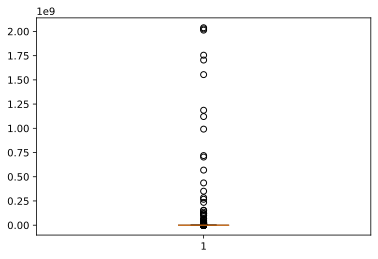

In [45]:
#Boxplot before removing outlier
plt.boxplot(df["DAILY_ENTRIES"])
plt.show()

In [47]:
Q1 = df['DAILY_ENTRIES'].quantile(0.25)
Q3 = df['DAILY_ENTRIES'].quantile(0.75)
IQR = Q3 - Q1
high = Q3 + 1.5 * IQR
low = Q1 - 1.5 * IQR

df = df[~((df['DAILY_ENTRIES'] < low) |(df['DAILY_ENTRIES'] > high))]

In [48]:
df.head()

,DIVISION,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
1,BMT,A002,R051,02-00-00,59 ST,09/01/2019,7184008,766.0
2,BMT,A002,R051,02-00-00,59 ST,09/02/2019,7184660,652.0
3,BMT,A002,R051,02-00-00,59 ST,09/03/2019,7185234,574.0
4,BMT,A002,R051,02-00-00,59 ST,09/04/2019,7186509,1275.0
5,BMT,A002,R051,02-00-00,59 ST,09/05/2019,7187851,1342.0


In [49]:
df['DAILY_ENTRIES'].nlargest(15)

74308     3531.0
112511    3531.0
112539    3531.0
128326    3531.0
140779    3531.0
182800    3531.0
226259    3531.0
266782    3531.0
274578    3531.0
288643    3531.0
308003    3531.0
317909    3531.0
325773    3531.0
330009    3531.0
330207    3531.0
Name: DAILY_ENTRIES, dtype: float64

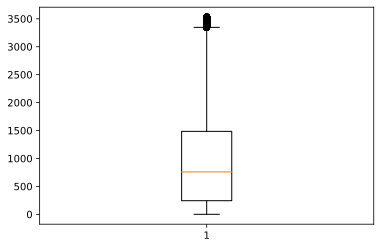

In [50]:
#Boxplot After removing outlier
plt.boxplot(df["DAILY_ENTRIES"])
plt.show()

## Set MONTH Column

In [57]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [58]:
df['MONTH'] = df['DATE'].dt.month_name()

In [59]:
df.head()

,DIVISION,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES,MONTH
1,BMT,A002,R051,02-00-00,59 ST,2019-09-01,7184008,766.0,September
2,BMT,A002,R051,02-00-00,59 ST,2019-09-02,7184660,652.0,September
3,BMT,A002,R051,02-00-00,59 ST,2019-09-03,7185234,574.0,September
4,BMT,A002,R051,02-00-00,59 ST,2019-09-04,7186509,1275.0,September
5,BMT,A002,R051,02-00-00,59 ST,2019-09-05,7187851,1342.0,September


## Set DAY Column

In [60]:
df['DAY'] = df['DATE'].dt.day_name()

In [61]:
df.head()

,DIVISION,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES,MONTH,DAY
1,BMT,A002,R051,02-00-00,59 ST,2019-09-01,7184008,766.0,September,Sunday
2,BMT,A002,R051,02-00-00,59 ST,2019-09-02,7184660,652.0,September,Monday
3,BMT,A002,R051,02-00-00,59 ST,2019-09-03,7185234,574.0,September,Tuesday
4,BMT,A002,R051,02-00-00,59 ST,2019-09-04,7186509,1275.0,September,Wednesday
5,BMT,A002,R051,02-00-00,59 ST,2019-09-05,7187851,1342.0,September,Thursday


## Set TURSTILE_ENTRY Column

In [62]:
df["TURSTILE_ENTRY"] = df.groupby(["C/A", "UNIT", "SCP", "STATION","DIVISION"])[["DAILY_ENTRIES"]].transform('sum')

In [63]:
df.head()

,DIVISION,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES,MONTH,DAY,TURSTILE_ENTRY
1,BMT,A002,R051,02-00-00,59 ST,2019-09-01,7184008,766.0,September,Sunday,106423.0
2,BMT,A002,R051,02-00-00,59 ST,2019-09-02,7184660,652.0,September,Monday,106423.0
3,BMT,A002,R051,02-00-00,59 ST,2019-09-03,7185234,574.0,September,Tuesday,106423.0
4,BMT,A002,R051,02-00-00,59 ST,2019-09-04,7186509,1275.0,September,Wednesday,106423.0
5,BMT,A002,R051,02-00-00,59 ST,2019-09-05,7187851,1342.0,September,Thursday,106423.0


## Get top 15-Stations (378 Total Stations)

In [64]:
df_plot1 = df.groupby(["STATION"], as_index=False)["DAILY_ENTRIES"].sum().sort_values(by ='DAILY_ENTRIES', ascending = False).head(15)
df_plot1 = df_plot1.reset_index()
del df_plot1['index']
df_plot1


,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,11740083.0
1,23 ST,8658529.0
2,FULTON ST,7378024.0
3,TIMES SQ-42 ST,6776567.0
4,86 ST,5777087.0
5,42 ST-PORT AUTH,5654103.0
6,GRD CNTRL-42 ST,5471933.0
7,125 ST,5456945.0
8,CANAL ST,5352146.0
9,34 ST-HERALD SQ,4999981.0


<ipython-input-67-7c438862a6c8>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


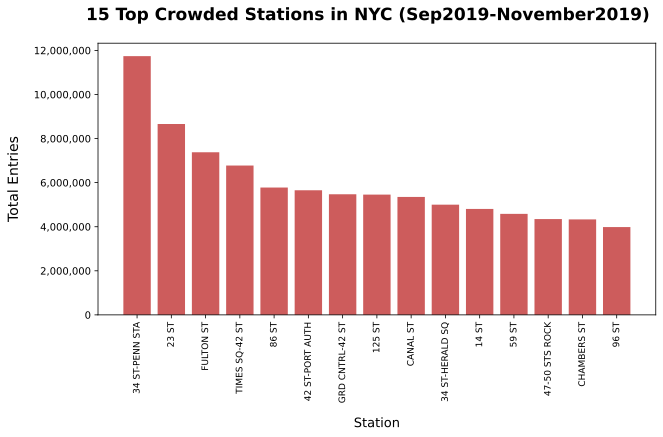

In [67]:
plt.figure(figsize=[10,5])
plt.suptitle('15 Top Crowded Stations in NYC (Sep2019-November2019)',fontsize = 17,weight='bold')
plt.xlabel('Station',fontsize = 13,labelpad = 14)
plt.ylabel('Total Entries',fontsize = 14,labelpad = 13)
plt.xticks(rotation = 90 , fontsize = 9)
plt.ticklabel_format(style='plain')
#
new_x = df_plot1['STATION']
new_y = df_plot1['DAILY_ENTRIES'] 
#
plt.bar(new_x,new_y, color = 'indianred')
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

### Top 3 Stations (7 - 11.7 million)

In [68]:
df_plot1.head(3)

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,11740083.0
1,23 ST,8658529.0
2,FULTON ST,7378024.0


### Crowded Stations (5.5 - 6.8 million)

In [69]:
df_plot1.iloc[3:6]

,STATION,DAILY_ENTRIES
3,TIMES SQ-42 ST,6776567.0
4,86 ST,5777087.0
5,42 ST-PORT AUTH,5654103.0


### Crowded Stations (4 - 5.5 million)

In [77]:
df_plot1.iloc[6:15]

,STATION,DAILY_ENTRIES
6,GRD CNTRL-42 ST,5471933.0
7,125 ST,5456945.0
8,CANAL ST,5352146.0
9,34 ST-HERALD SQ,4999981.0
10,14 ST,4805297.0
11,59 ST,4583020.0
12,47-50 STS ROCK,4345519.0
13,CHAMBERS ST,4330061.0
14,96 ST,3982820.0


In [71]:
df.head()

,DIVISION,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES,MONTH,DAY,TURSTILE_ENTRY
1,BMT,A002,R051,02-00-00,59 ST,2019-09-01,7184008,766.0,September,Sunday,106423.0
2,BMT,A002,R051,02-00-00,59 ST,2019-09-02,7184660,652.0,September,Monday,106423.0
3,BMT,A002,R051,02-00-00,59 ST,2019-09-03,7185234,574.0,September,Tuesday,106423.0
4,BMT,A002,R051,02-00-00,59 ST,2019-09-04,7186509,1275.0,September,Wednesday,106423.0
5,BMT,A002,R051,02-00-00,59 ST,2019-09-05,7187851,1342.0,September,Thursday,106423.0


## Weekend or Week days (weekend 'saturday, sunday')

In [78]:
df_plot2 = df.groupby(['MONTH','DAY'], as_index=False)["DAILY_ENTRIES"].sum()
df_plot2

,MONTH,DAY,DAILY_ENTRIES
0,November,Friday,23801778.0
1,November,Monday,10244377.0
2,November,Saturday,21322426.0
3,November,Sunday,12935067.0
4,November,Thursday,21266558.0
5,November,Tuesday,20565800.0
6,November,Wednesday,21234445.0
7,October,Friday,21959371.0
8,October,Monday,10035087.0
9,October,Saturday,21657785.0


In [79]:
df_plot3 = df.groupby('DAY', as_index=False)["DAILY_ENTRIES"].sum().sort_values(by ='DAILY_ENTRIES', ascending = False)


In [80]:
df_plot4 = df_plot3[(df_plot3['DAY'] == 'Saturday') | (df_plot3['DAY'] == 'Sunday')]
df_plot4

,DAY,DAILY_ENTRIES
2,Saturday,64488968.0
3,Sunday,42286025.0


In [81]:
df_plot5 = df_plot3[(df_plot3['DAY'] != 'Saturday') & (df_plot3['DAY'] != 'Sunday')]
df_plot5

,DAY,DAILY_ENTRIES
4,Thursday,69350105.0
6,Wednesday,69002281.0
0,Friday,67448623.0
5,Tuesday,63841591.0
1,Monday,33438849.0


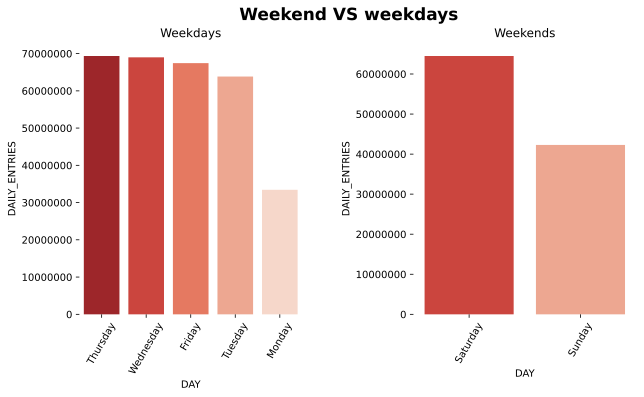

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
plt.subplots_adjust(wspace=0.5) #Space between graphs
fig.suptitle('Weekend VS weekdays', weight='bold', fontsize = 17)
sns.despine(bottom = True, left = True) #remove border


# First subgraph
#Style
axes[0].set(xlabel='Day', ylabel='Total Entries', title='Weekdays')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].tick_params(axis='x', rotation=60)
#Plot
sns.barplot(ax=axes[0], x=df_plot5['DAY'], y=df_plot5['DAILY_ENTRIES'], palette="Reds_r")

# Second subgraph
#Style

axes[1].set(xlabel='Day', ylabel='Total Entries', title='Weekends')
axes[1].ticklabel_format(style='plain', axis='y')
axes[1].tick_params(axis='x', rotation=60)
#Plot
sns.barplot(ax=axes[1], x=df_plot4['DAY'], y=df_plot4['DAILY_ENTRIES'], palette="Reds_r")
plt.show()